In [38]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [39]:

# ---- parameters ----

S0 = 100.0      # spot price
K  = 100.0      # strike
r  = 0.05       # risk-free rate (annual)
sigma = 0.20    # annual volatility
T = 1.0         # time to maturity (years)
N = 100_000     # number of Monte Carlo paths
seed = 2025

In [40]:
rng = np.random.default_rng(seed)

In [41]:
z = rng.standard_normal(N//2)
z_all = np.concatenate([z, -z])       # antithetic variates
ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*z_all)

In [42]:
# ---- Monte Carlo payoff ----
payoff = np.maximum(ST - K, 0)
disc = np.exp(-r*T)*payoff
mc_price = disc.mean()
mc_se = disc.std(ddof=1) / np.sqrt(len(disc))

In [43]:
# ---- Black–Scholes ----
d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
bs_price = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [44]:
print("MC Price:", mc_price, "SE:", mc_se)
print("95% CI:", mc_price-1.96*mc_se, "to", mc_price+1.96*mc_se)
print("BS Price:", bs_price)

MC Price: 10.427079206336007 SE: 0.046416692496069736
95% CI: 10.33610248904371 to 10.518055923628303
BS Price: 10.450583572185565


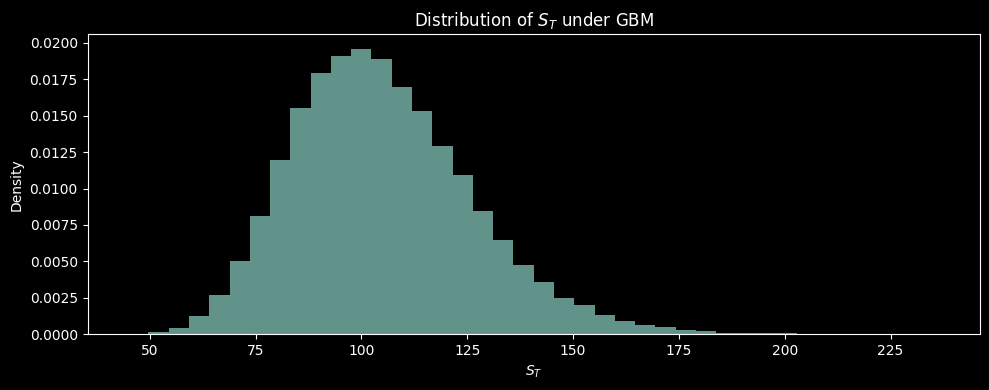

In [52]:
plt.style.use("dark_background")
plt.figure(figsize=(10,4))
plt.hist(ST, bins=40, density=True, alpha=0.7)
plt.title("Distribution of $S_T$ under GBM")
plt.xlabel("$S_T$")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

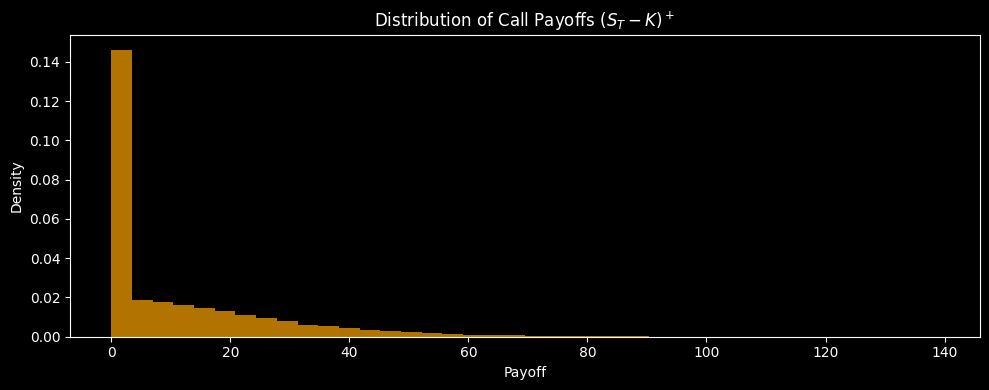

In [53]:
plt.style.use("dark_background")
plt.figure(figsize=(10,4))
plt.hist(payoff, bins=40, density=True, alpha=0.7, color='orange')
plt.title("Distribution of Call Payoffs $(S_T - K)^+$")
plt.xlabel("Payoff")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [47]:
Ns = [1000, 2000, 5000, 10000, 20000, 50000]
prices = []
errors = []

In [48]:
for n in Ns:
    z = rng.standard_normal(n//2)
    z_all = np.concatenate([z, -z])
    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*z_all)
    disc = np.exp(-r*T) * np.maximum(ST-K, 0)
    prices.append(disc.mean())
    errors.append(disc.std(ddof=1)/np.sqrt(len(disc)))

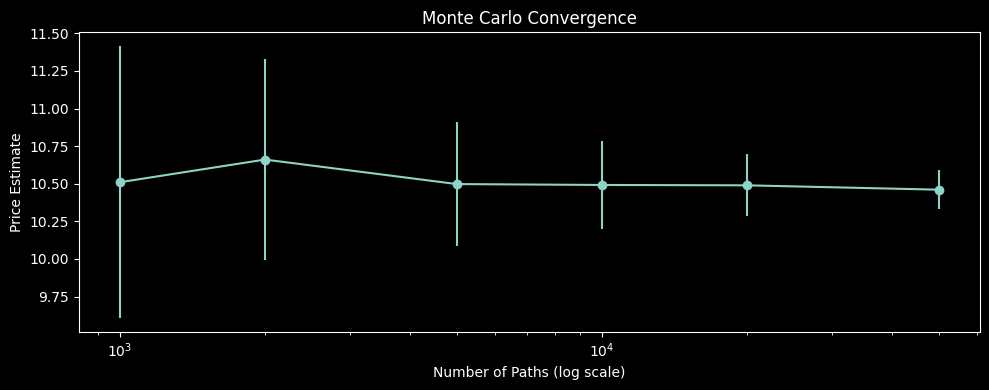

In [54]:
plt.style.use("dark_background")
plt.figure(figsize=(10,4))
plt.errorbar(Ns, prices, yerr=1.96*np.array(errors), fmt='o-')
plt.xscale("log")
plt.title("Monte Carlo Convergence")
plt.xlabel("Number of Paths (log scale)")
plt.ylabel("Price Estimate")
plt.tight_layout()
plt.show()